In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
feature = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
submit = pd.read_csv("sampleSubmission.csv")

In [3]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
submit.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [8]:
#データ数を確認（行,列）
feature.shape

(8190, 12)

In [9]:
stores.shape

(45, 3)

In [10]:
df_train.shape

(421570, 5)

In [11]:
df_test.shape

(115064, 4)

In [12]:
#df_train から "Store"を抽出
df_train["Store"]

0          1
1          1
2          1
3          1
4          1
          ..
421565    45
421566    45
421567    45
421568    45
421569    45
Name: Store, Length: 421570, dtype: int64

In [13]:
df_train["Store"].nunique()

45

In [14]:
df_train["Dept"]

0          1
1          1
2          1
3          1
4          1
          ..
421565    98
421566    98
421567    98
421568    98
421569    98
Name: Dept, Length: 421570, dtype: int64

In [15]:
df_train["Dept"].nunique() #1～98の内、81カテゴリが存在(欠損値あり)

81

In [16]:
df_train["Dept"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [17]:
df_train["Date"]

0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
             ...    
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, Length: 421570, dtype: object

In [18]:
df_train["Date"].nunique() #2010/02/05～2012/10/26の143週間分

143

In [19]:
df_test["Date"]

0         2012-11-02
1         2012-11-09
2         2012-11-16
3         2012-11-23
4         2012-11-30
             ...    
115059    2013-06-28
115060    2013-07-05
115061    2013-07-12
115062    2013-07-19
115063    2013-07-26
Name: Date, Length: 115064, dtype: object

In [20]:
df_test["Date"].nunique()

39

##学習データ
-店舗データに関しては、1～45の45店舗分
-カテゴリデータに関しては、1～99の81カテゴリ分
-2010/02/05～2012/10/26の143週分
###テストデータ
-2012/11/2～2013/7/26の39週分

<Axes: xlabel='Dept', ylabel='count'>

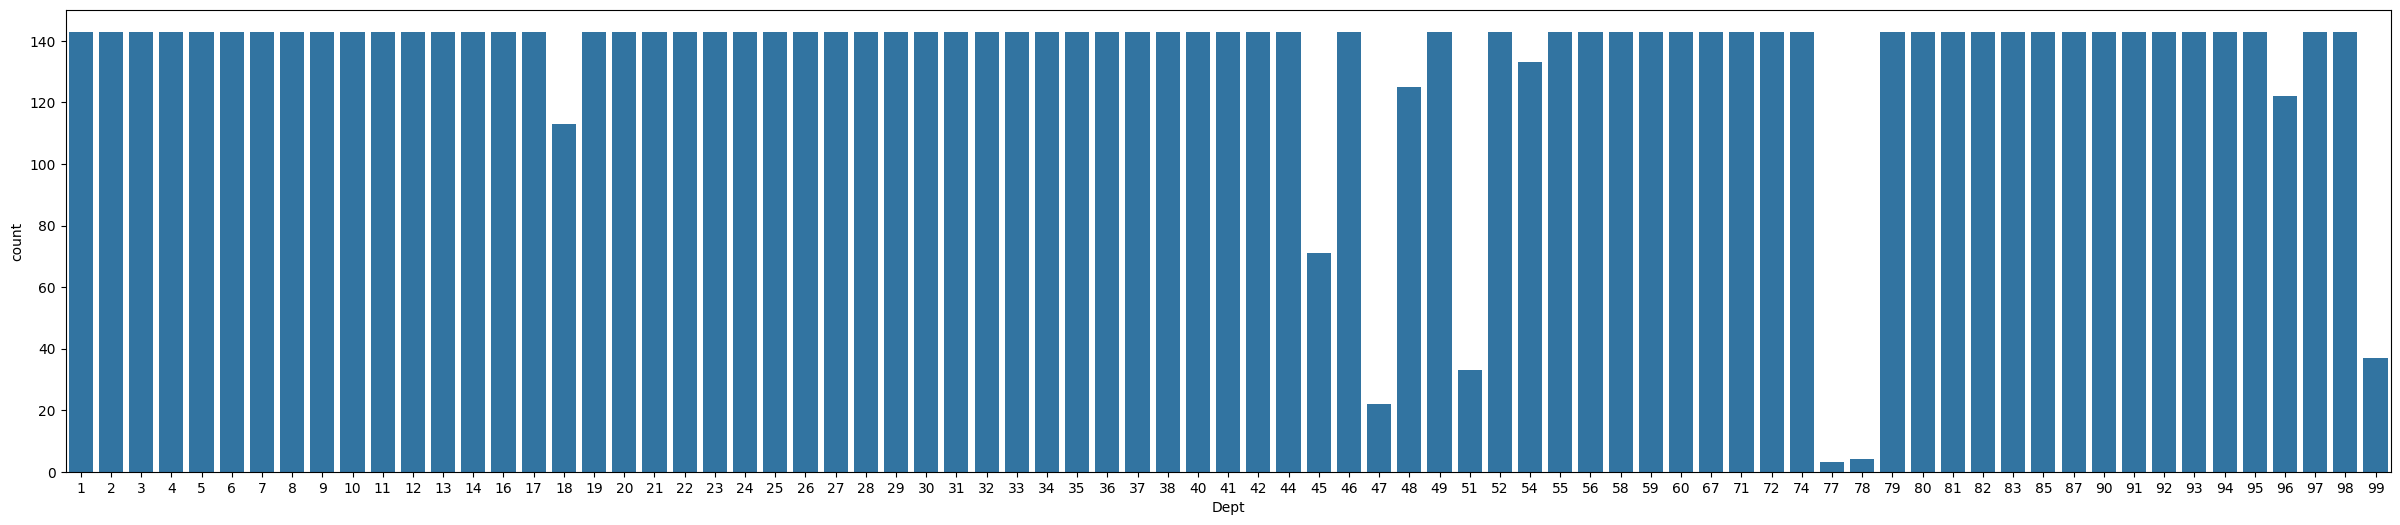

In [21]:
#df_trainの店舗1のdept(1～99の81部門)で、143週分あるかどうか⇒週によって売上が立ってない
plt.figure(figsize=(30,6))
sns.countplot(x="Dept",data=df_train[df_train["Store"]==1])

<Axes: xlabel='Dept', ylabel='count'>

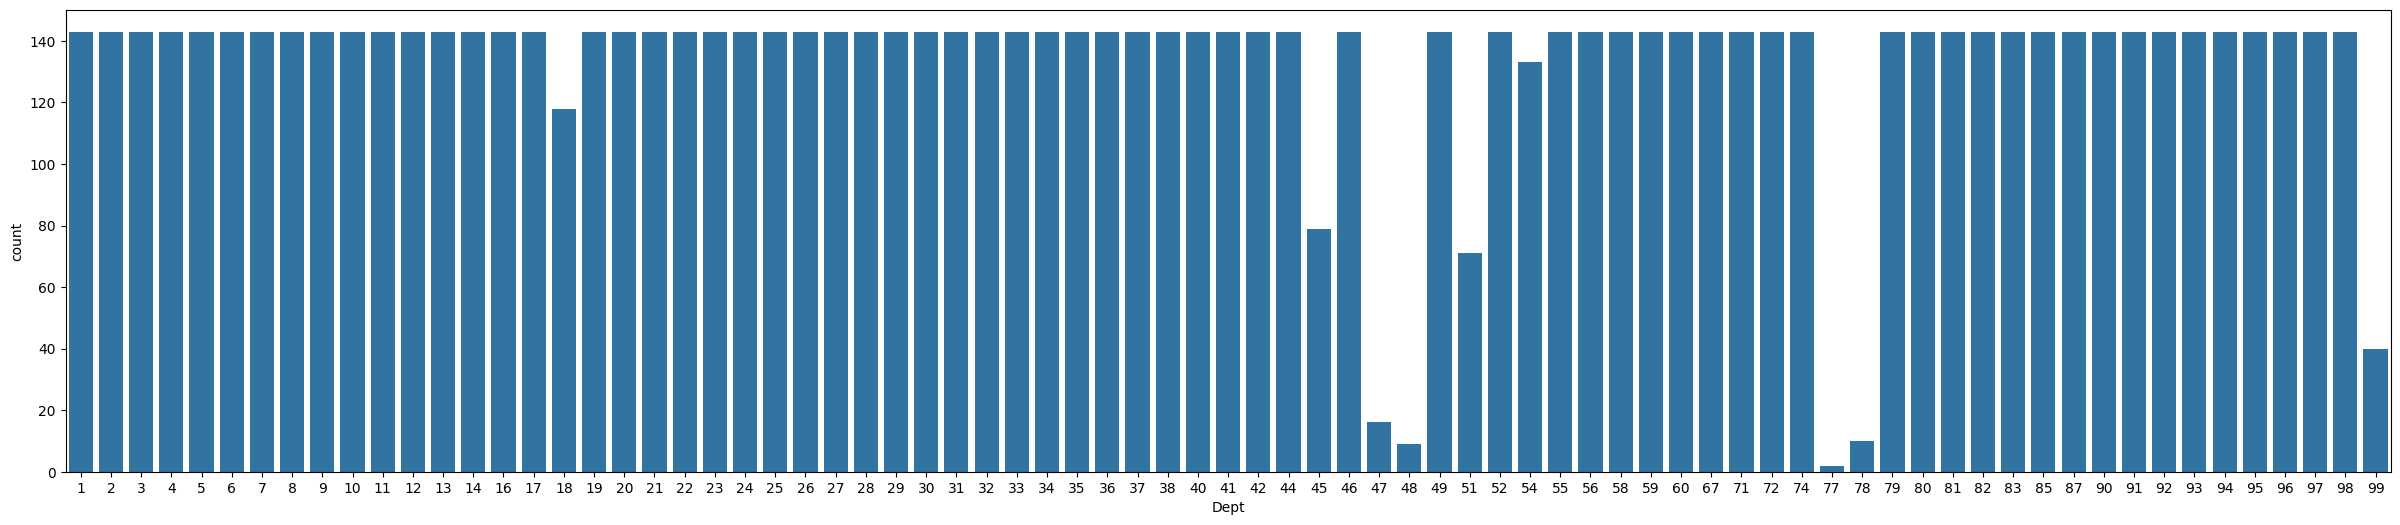

In [22]:
plt.figure(figsize=(30,6))
sns.countplot(x="Dept",data=df_train[df_train["Store"]==32])

<Axes: xlabel='Store', ylabel='count'>

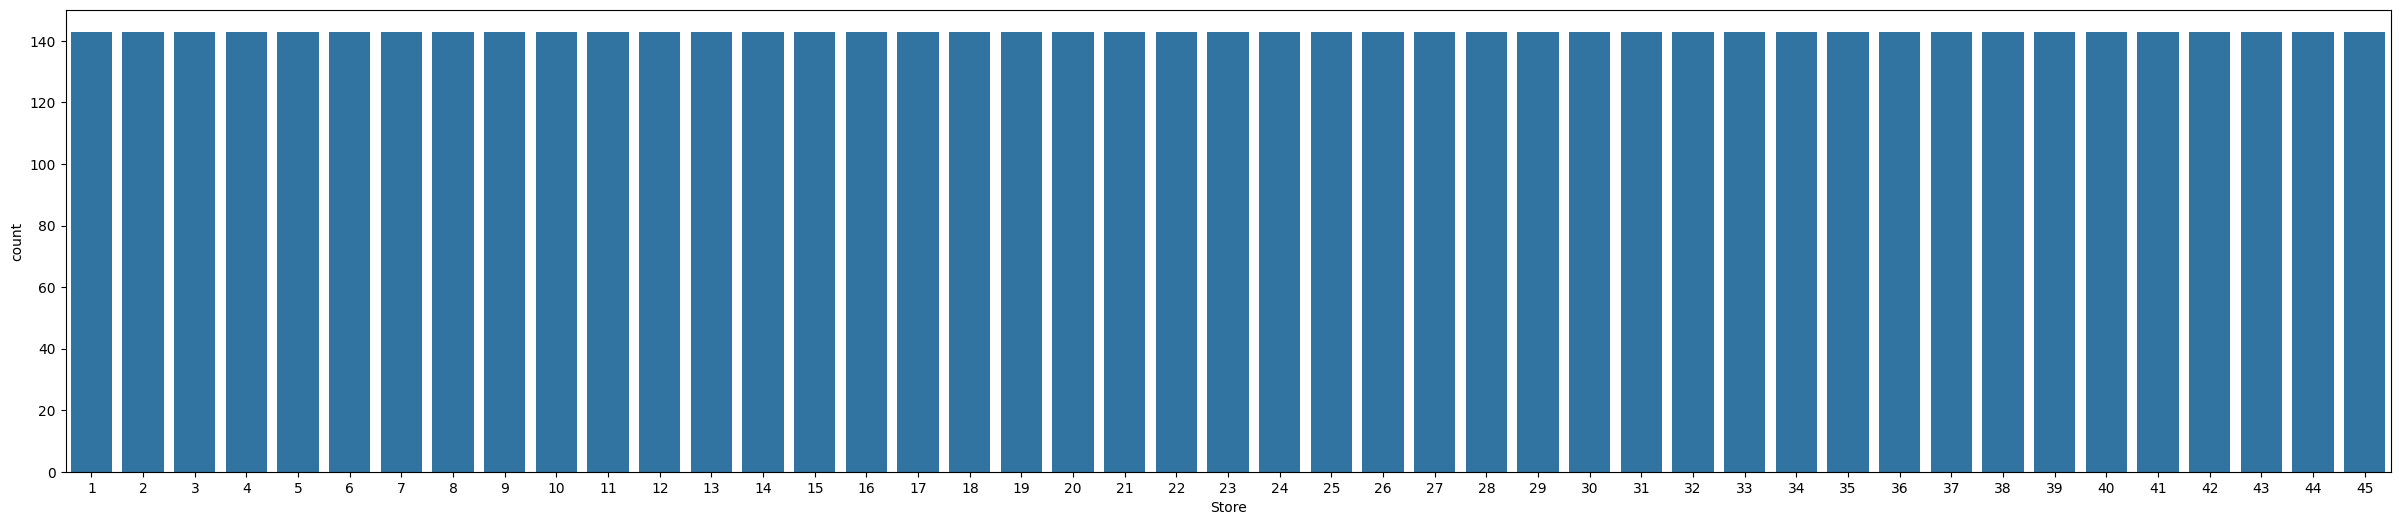

In [23]:
#1～45店舗で、カテゴリ1の売上推移を確認
plt.figure(figsize=(30,6))
sns.countplot(x="Store",data=df_train[df_train["Dept"]==1])

<Axes: xlabel='Store', ylabel='count'>

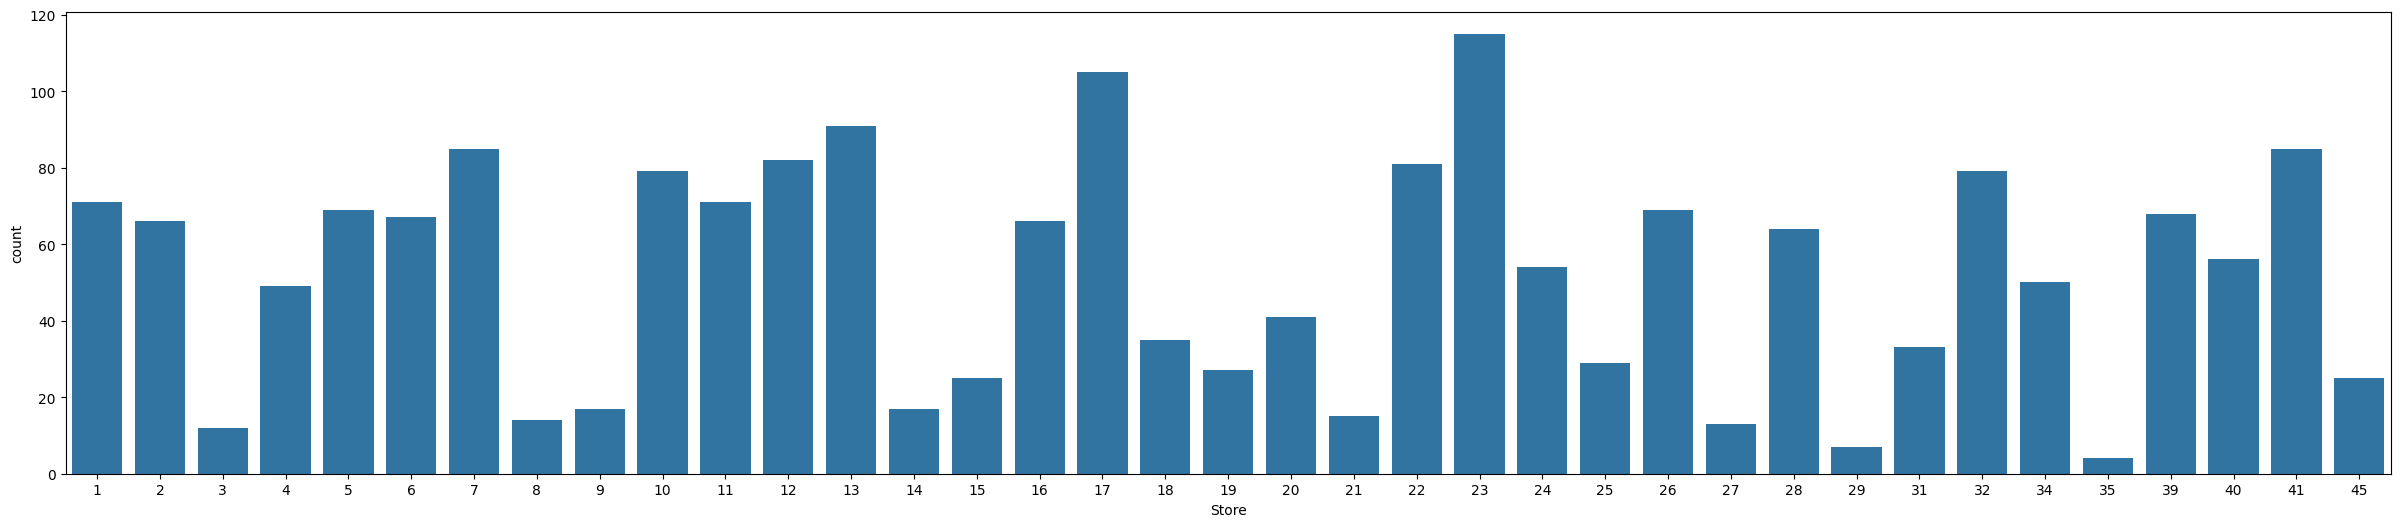

In [24]:
#1～45店舗で、カテゴリ45の売上推移を確認⇒どの店舗もカテゴリ45の売上は微妙
plt.figure(figsize=(30,6))
sns.countplot(x="Store",data=df_train[df_train["Dept"]==45])

In [25]:
#index(行)をStores、columns(列)をDateに指定⇒カテゴリ45の売上を縦軸:店舗、横軸:日付にして確認
pd.pivot_table(df_train[df_train["Dept"]==45],index="Store",columns="Date",values="Weekly_Sales")

Date,2010-02-05,2010-02-12,2010-02-19,2010-02-26,2010-03-05,2010-03-12,2010-03-19,2010-03-26,2010-04-02,2010-04-09,...,2012-08-24,2012-08-31,2012-09-07,2012-09-14,2012-09-21,2012-09-28,2012-10-05,2012-10-12,2012-10-19,2012-10-26
Store,,,,,,,,,,,,,,,,,,,,,
1,37.44,34.47,22.94,45.41,74.35,29.97,8.50,10.00,13.50,35.97,...,NaN,NaN,10.47,NaN,52.35,20.94,NaN,10.47,NaN,20.94
2,27.50,20.50,42.25,164.50,32.50,158.00,26.00,19.50,52.00,-118.00,...,NaN,5.97,NaN,NaN,NaN,20.94,NaN,10.47,NaN,NaN
3,4.50,NaN,4.00,NaN,NaN,4.50,8.50,NaN,4.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.50,2.50,NaN,14.97,NaN,NaN,5.96,13.43,NaN,2.96,...,10.47,NaN,10.47,NaN,10.47,NaN,NaN,NaN,NaN,10.47
5,NaN,NaN,NaN,10.96,26.88,1.51,3.36,NaN,4.96,9.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,24.62,42.00,14.06,10.00,47.00,101.00,70.00,74.00,32.00,79.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.00,23.78,21.54,14.54,22.81,36.02,3.00,NaN,NaN,19.06,...,5.97,NaN,107.46,8.97,NaN,8.97,NaN,NaN,35.82,NaN
8,NaN,2.50,NaN,NaN,4.00,2.50,NaN,NaN,NaN,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,7.50,7.50,5.50,2.00,NaN,NaN,NaN,2.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Date', ylabel='Store'>

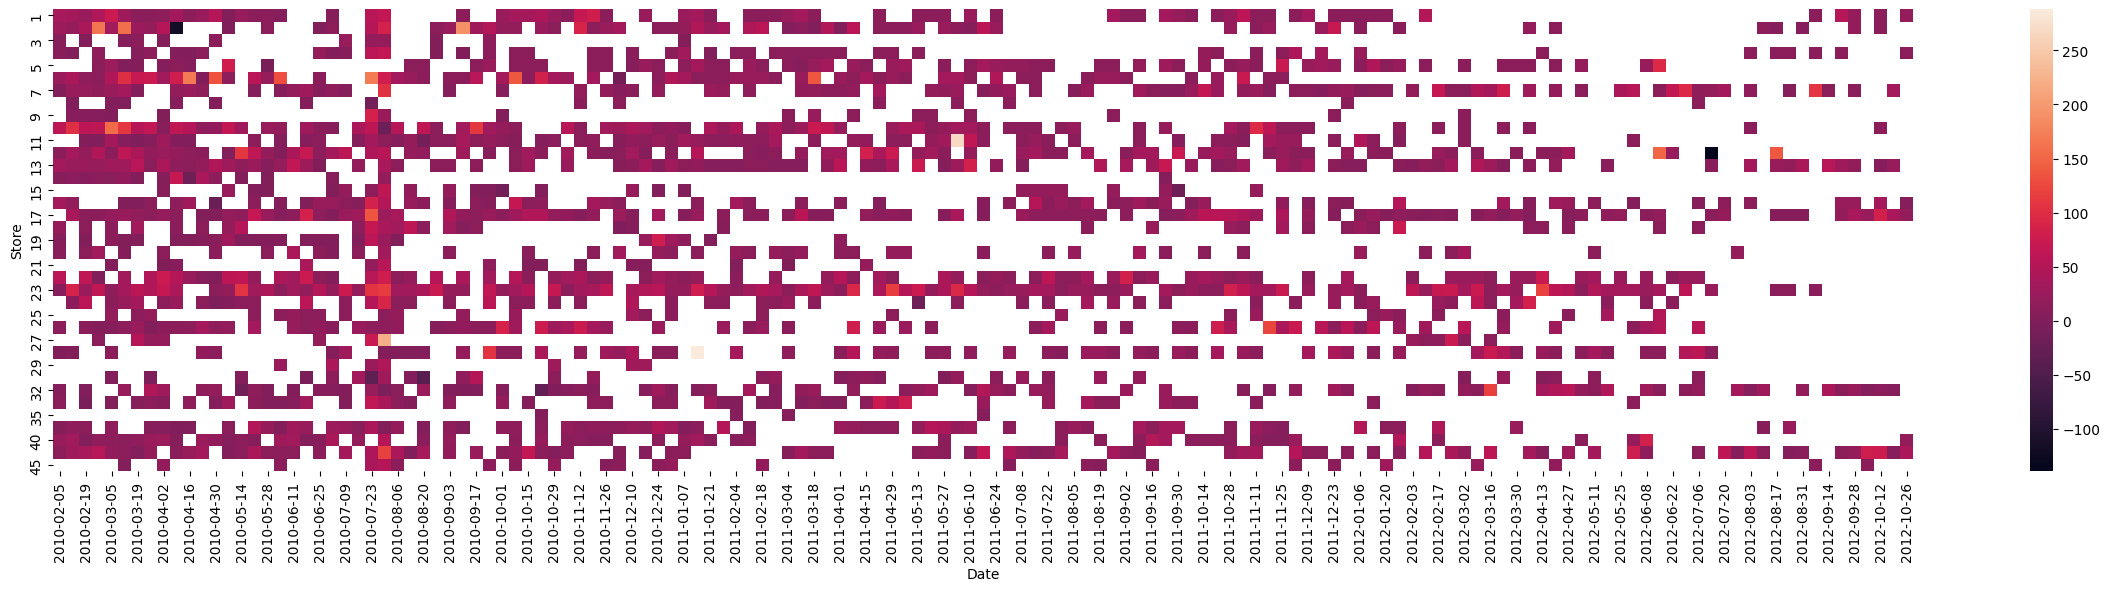

In [26]:
plt.figure(figsize=(30,6))
sns.heatmap(pd.pivot_table(df_train[df_train["Dept"]==45],index="Store",columns="Date",values="Weekly_Sales")) #時系列でカテゴリ45は売上が減少傾向

<Axes: xlabel='Dept', ylabel='Weekly_Sales'>

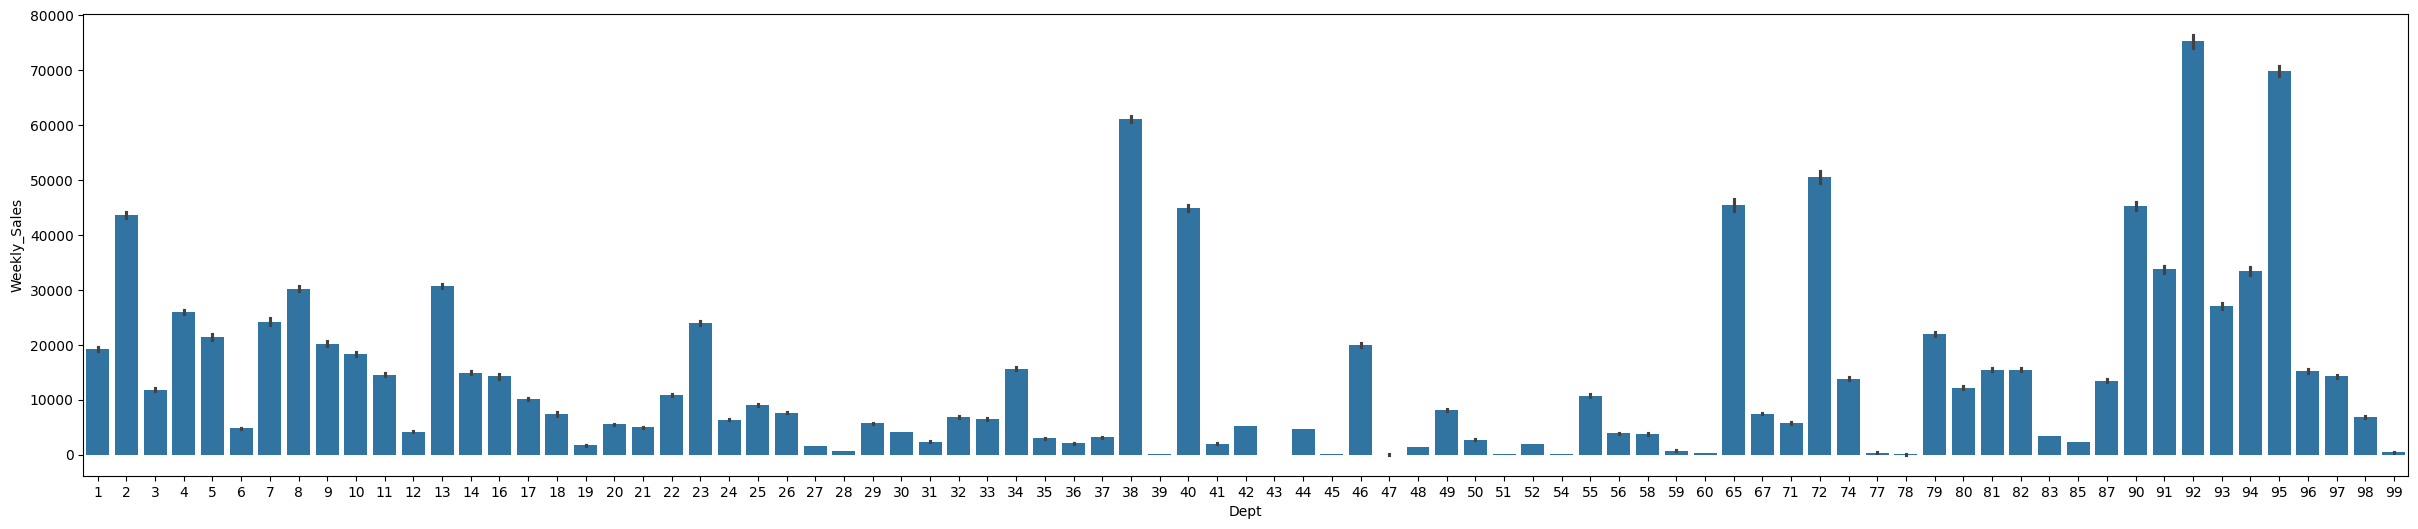

In [27]:
plt.figure(figsize=(30,6))
sns.barplot(x="Dept",y="Weekly_Sales",data=df_train)

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

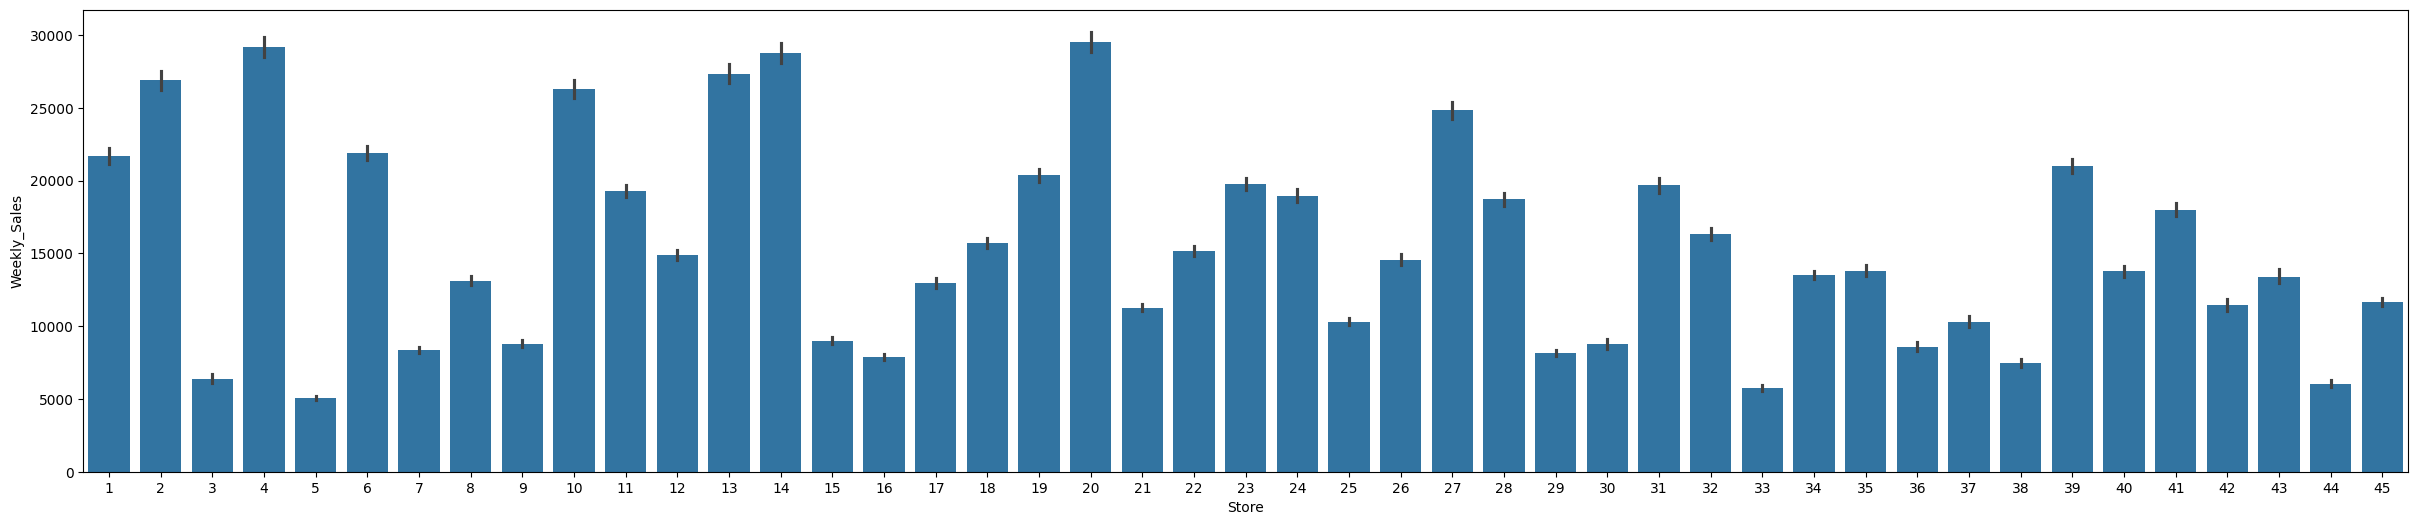

In [28]:
plt.figure(figsize=(30,6))
sns.barplot(x="Store",y="Weekly_Sales",data=df_train)

In [29]:
stores #店舗における、タイプとそのサイズを示す

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [30]:
#df_train データフレームを Store 列でグループ化し、各グループの数値列の合計を計算
df_train.groupby("Store").sum()

,Dept,Date,Weekly_Sales,IsHoliday
Store,,,,
1,454749,2010-02-052010-02-122010-02-192010-02-262010-0...,2.224028e+08,723
2,455425,2010-02-052010-02-122010-02-192010-02-262010-0...,2.753824e+08,722
3,370825,2010-02-052010-02-122010-02-192010-02-262010-0...,5.758674e+07,633
4,457340,2010-02-052010-02-122010-02-192010-02-262010-0...,2.995440e+08,727
5,371526,2010-02-052010-02-122010-02-192010-02-262010-0...,4.547569e+07,640
6,453812,2010-02-052010-02-122010-02-192010-02-262010-0...,2.237561e+08,721
7,432878,2010-02-052010-02-122010-02-192010-02-262010-0...,8.159828e+07,691
8,432217,2010-02-052010-02-122010-02-192010-02-262010-0...,1.299512e+08,696
9,355292,2010-02-052010-02-122010-02-192010-02-262010-0...,7.778922e+07,625


In [31]:
#その中から "Weekl_sales" 列を選択して、インデックスをリセットする処理
df_train.groupby("Store").sum()[["Weekly_Sales"]].reset_index()

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [32]:
#df_trainのstoreのデータに対してweekly_salesがdate毎になっているのでまとめる
pd.merge(stores,df_train.groupby("Store").sum()[["Weekly_Sales"]].reset_index())

,Store,Type,Size,Weekly_Sales
0,1,A,151315,2.224028e+08
1,2,A,202307,2.753824e+08
2,3,B,37392,5.758674e+07
3,4,A,205863,2.995440e+08
4,5,B,34875,4.547569e+07
5,6,A,202505,2.237561e+08
6,7,B,70713,8.159828e+07
7,8,A,155078,1.299512e+08
8,9,B,125833,7.778922e+07
9,10,B,126512,2.716177e+08


<Axes: xlabel='Type', ylabel='Weekly_Sales'>

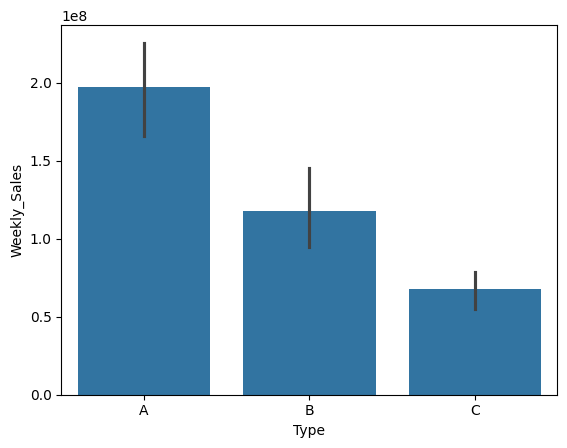

In [33]:
#storesのデータにweekly_salesを入れてサイズによって売上がどう変化するか調べる
df_tmp=pd.merge(df_train.groupby("Store").sum()[["Weekly_Sales"]].reset_index(),stores)
sns.barplot(x="Type",y="Weekly_Sales",data=df_tmp)

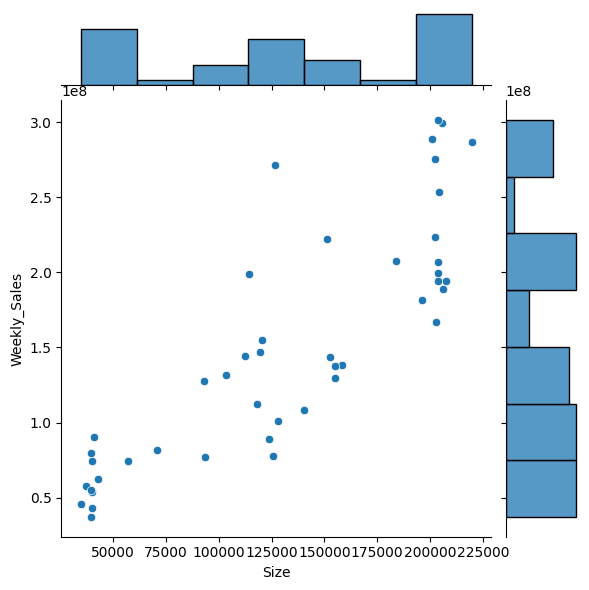

In [34]:
#散布図
sns.jointplot(x="Size",y="Weekly_Sales",data=df_tmp)

In [35]:
#相関関係
df_tmp.corr(numeric_only=True)

,Store,Weekly_Sales,Size
Store,1.00000,-0.350100,-0.244270
Weekly_Sales,-0.35010,1.000000,0.846161
Size,-0.24427,0.846161,1.000000


In [36]:
df_tmp

,Store,Weekly_Sales,Type,Size
0,1,2.224028e+08,A,151315
1,2,2.753824e+08,A,202307
2,3,5.758674e+07,B,37392
3,4,2.995440e+08,A,205863
4,5,4.547569e+07,B,34875
5,6,2.237561e+08,A,202505
6,7,8.159828e+07,B,70713
7,8,1.299512e+08,A,155078
8,9,7.778922e+07,B,125833
9,10,2.716177e+08,B,126512


In [37]:
#df_trainのdateを軸に作り替え
df_tmp2 = df_train.groupby("Date").sum()
df_tmp2

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,65124,130557,49750740.50,0
2010-02-12,65082,131179,48336677.63,2956
2010-02-19,65610,131897,48276993.78,0
2010-02-26,65045,130161,43968571.13,0
2010-03-05,64897,129670,46871470.30,0
...,...,...,...,...
2012-09-28,65866,130785,43734899.40,0
2012-10-05,66296,132468,47566639.31,0
2012-10-12,66453,133371,46128514.25,0


In [38]:
#reset_indexでカラムに入れる
df_tmp2 = df_train.groupby("Date").sum().reset_index()
df_tmp2

,Date,Store,Dept,Weekly_Sales,IsHoliday
0,2010-02-05,65124,130557,49750740.50,0
1,2010-02-12,65082,131179,48336677.63,2956
2,2010-02-19,65610,131897,48276993.78,0
3,2010-02-26,65045,130161,43968571.13,0
4,2010-03-05,64897,129670,46871470.30,0
...,...,...,...,...,...
138,2012-09-28,65866,130785,43734899.40,0
139,2012-10-05,66296,132468,47566639.31,0
140,2012-10-12,66453,133371,46128514.25,0
141,2012-10-19,65630,130255,45122410.57,0


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

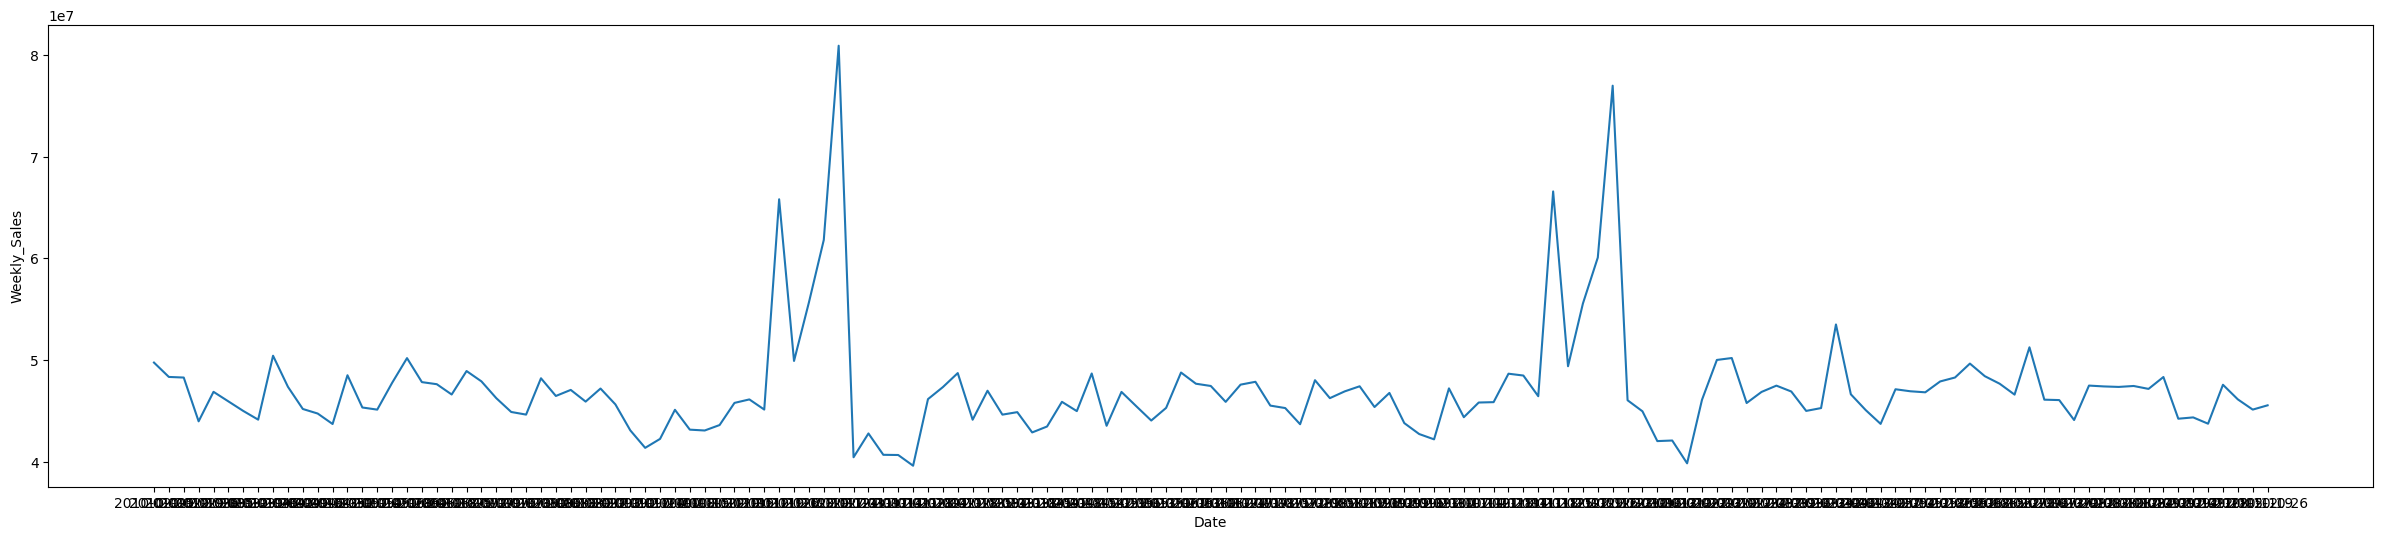

In [39]:
plt.figure(figsize=(30,6))
df_tmp2 = df_train.groupby("Date").sum().reset_index()
sns.lineplot(x="Date",y="Weekly_Sales",data=df_tmp2)

In [40]:
#まず、dateごとでまとめた後、Storeごとに整理
df_tmp3 = df_train.groupby(["Date","Store"]).sum().reset_index()
df_tmp3

,Date,Store,Dept,Weekly_Sales,IsHoliday
0,2010-02-05,1,3184,1643690.90,0
1,2010-02-05,2,3251,2136989.46,0
2,2010-02-05,3,2640,461622.22,0
3,2010-02-05,4,3233,2135143.87,0
4,2010-02-05,5,2458,317173.10,0
...,...,...,...,...,...
6430,2012-10-26,41,3244,1316542.59,0
6431,2012-10-26,42,2411,514756.08,0
6432,2012-10-26,43,2242,587603.55,0
6433,2012-10-26,44,2465,361067.07,0


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

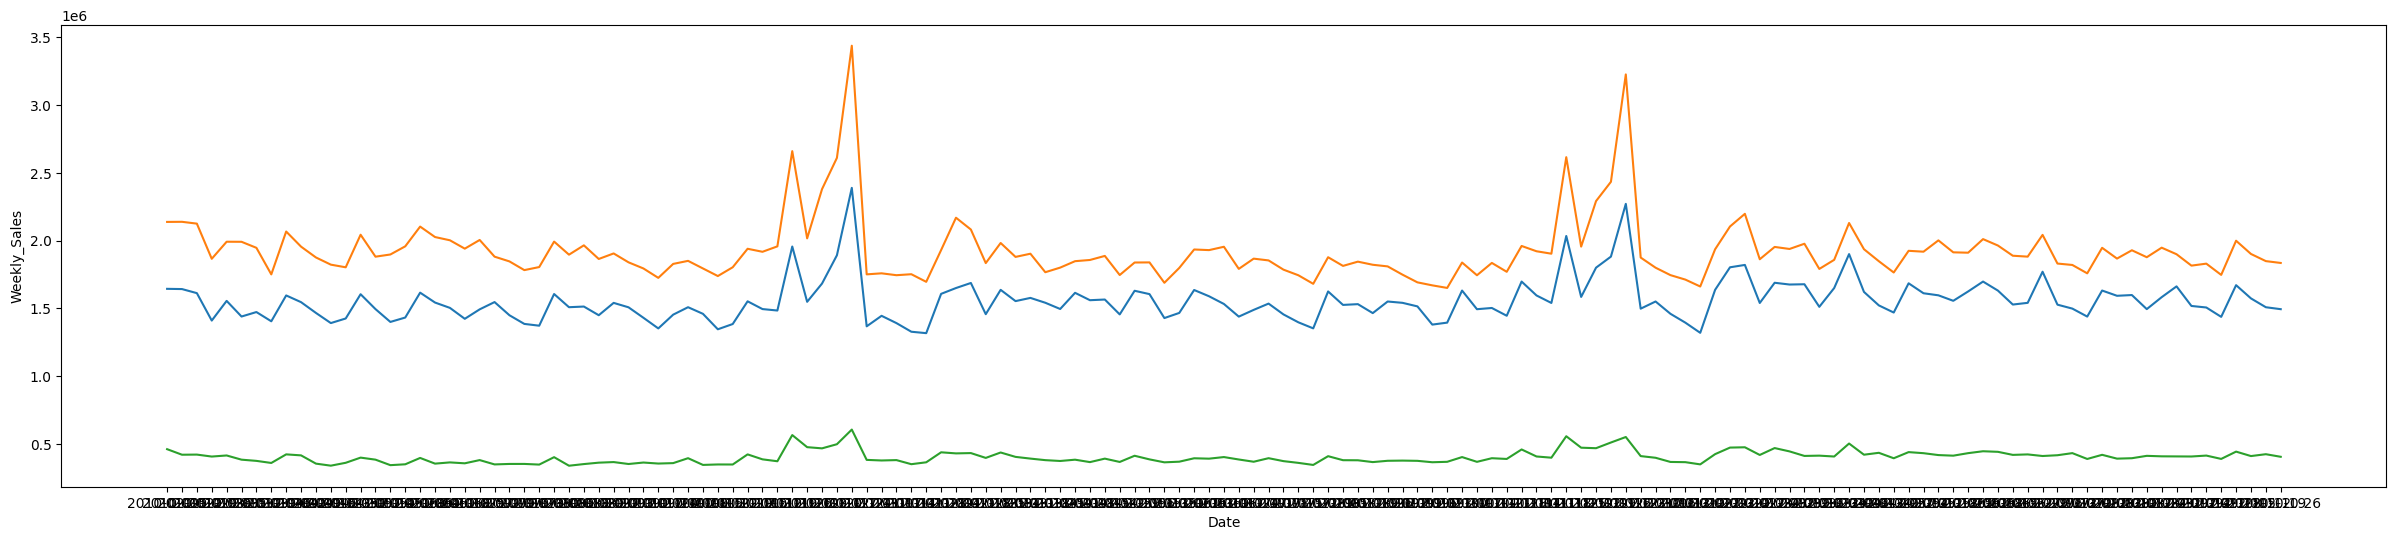

In [41]:
#store1のdateごとのweekly_salesの推移
plt.figure(figsize=(30,6))
df_tmp3 = df_train.groupby(["Date","Store"]).sum().reset_index()
sns.lineplot(x="Date",y="Weekly_Sales",data=df_tmp3[df_tmp3["Store"]==1])
sns.lineplot(x="Date",y="Weekly_Sales",data=df_tmp3[df_tmp3["Store"]==2])
sns.lineplot(x="Date",y="Weekly_Sales",data=df_tmp3[df_tmp3["Store"]==3])

In [42]:
df_tmp2 = df_train.groupby("Date").sum().reset_index()

#Weekly_Salesの高い順でソートをかける
df_tmp2.sort_values("Weekly_Sales",ascending=False).head(10)

,Date,Store,Dept,Weekly_Sales,IsHoliday
46,2010-12-24,65507,130460,80931415.60,0
98,2011-12-23,67073,135571,76998241.31,0
94,2011-11-25,66864,135801,66593605.26,3021
42,2010-11-26,65217,129373,65821003.24,2938
45,2010-12-17,65676,130438,61820799.85,0
97,2011-12-16,66894,134714,60085695.94,0
44,2010-12-10,65354,129960,55666770.39,0
96,2011-12-09,66809,134656,55561147.70,0
113,2012-04-06,66323,132587,53502315.87,0
126,2012-07-06,65939,132367,51253021.88,0


In [43]:
import lightgbm as lgb

pd.merge(df_train,stores)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [44]:
pd.merge(pd.merge(df_train,stores),feature)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [45]:
df1=pd.merge(pd.merge(df_train,stores),feature)

df1["Date"]

0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
             ...    
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, Length: 421570, dtype: object

In [46]:
df1["Date"][1]

'2010-02-12'

In [47]:
#順番に応じて文字列を抽出⇒[][] ※0からスタート、2個目の数字は1個前で取り出す
df1["Date"][1][5:7]

'02'

In [48]:
#日付データから月のデータを抽出
df1["Date"].apply(lambda x:x[5:7])

0         02
1         02
2         02
3         02
4         03
          ..
421565    09
421566    10
421567    10
421568    10
421569    10
Name: Date, Length: 421570, dtype: object

In [49]:
#df1のcolumnsにmonthを作る
df1["month"]=df1["Date"].apply(lambda x:x[5:7])

df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,02
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,02
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,02
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,02
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,09
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,10
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,10
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,10


In [50]:
def term_class(x):
    if int(x[8:10])<10:
        term=1
    elif int(x[8:10])<20:
        term=2
    else:
        term=3
    return term

df1["term"]=df1["Date"].apply(term_class)      

df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,term
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,02,1
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,02,2
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,02,2
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,02,3
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,09,3
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,10,1
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,10,2
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,10,2


In [51]:
#LightGBMに変数定義するものを教える
for col in ["Store","Dept","Type","month","term"]:
    df1[col]=df1[col].astype("category")

In [52]:
#日付文字列の日付部分を取り出して、月の前半(1)/中盤(2)/後半(3)を返す
def term_class(x):
    if int(x[8:10])<10:
        term=1
    elif int(x[8:10])<20:
        term=2
    else:
        term=3
    return term

#データフレーム df に前処理をかける
def preprocess(df1):
    #df["Date"]（例："2012-11-05"）から月部分だけを抜き出して "month" 列を作成
    df1["month"]=df1["Date"].apply(lambda x:x[5:7])
    #日付の10の位で3つに分けた "term" 列も作成
    df1["term"]=df1["Date"].apply(term_class) 

    #下記5つの列をカテゴリ型に変換（分析やモデルに使う準備）
    for col in ["Store","Dept","Type","month","term"]:
        #col は column（列） の略、colの中身をそれぞれ代入
        df1[col]=df1[col].astype("category")

    return df1

In [53]:
#monthとtermが入った形になってることを確認
df1=preprocess(df1)
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,term
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,02,1
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,02,2
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,02,2
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,02,3
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,09,3
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,10,1
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,10,2
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,10,2


#学習データ(モデル構築用)と検証データ(モデル精度の評価)に分ける
#過学習を避ける。手元のデータと未知のデータ、両方に対して精度良くするため

In [54]:
#学習データは2010/02/05～10/26の143週分
df1_val=df1[df1["Date"]>="2012-07-13"]
df1_tr=df1[df1["Date"]<"2012-07-13"]

In [55]:
#説明変数(x)=予測に使う材料・ヒントとなる特徴量(feature)の定義
df1_val_x=df1_val.drop(["Weekly_Sales","Date"],axis=1)
df1_tr_x=df1_tr.drop(["Weekly_Sales","Date"],axis=1)
df1_val_x

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,term
127,1,1,False,A,151315,77.12,3.256,7218.13,45.20,36.24,3909.38,2596.37,221.924158,6.908,07,2
128,1,1,False,A,151315,80.42,3.311,3213.00,313.72,9.53,2262.02,3228.19,221.932727,6.908,07,3
129,1,1,False,A,151315,82.66,3.407,7146.90,389.02,1.59,10267.54,4325.19,221.941295,6.908,07,3
130,1,1,False,A,151315,86.11,3.417,27584.78,119.98,30.23,12007.04,4661.71,221.949864,6.908,08,1
131,1,1,False,A,151315,85.05,3.494,11436.22,245.00,6.85,6964.26,4836.22,221.958433,6.908,08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,09,3
421566,45,98,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,10,1
421567,45,98,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,10,2
421568,45,98,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,10,2


In [56]:
#目的変数(y)=予測したい値・結果の定義
df1_val_y=df1_val["Weekly_Sales"]
df1_tr_y=df1_tr["Weekly_Sales"]
df1_tr_y

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421549      713.50
421550      856.35
421551      622.62
421552      690.52
421553      659.65
Name: Weekly_Sales, Length: 374203, dtype: float64

In [57]:
#LightGBM用のデータセット(箱)を用意＝=材料の下ごしらえ
trains=lgb.Dataset(df1_tr_x,df1_tr_y)
valids=lgb.Dataset(df1_val_x,df1_val_y)

In [58]:
#パラメータをセット（モデルに「こういうルールで学習してね」と教える設定）=料理方法
params={
    "objective":"regression",#回帰タスク
    "metric":"mae"#評価指標（MAE=平均絶対誤差)
}

In [59]:
#「xからyを学習する」LightBGMが木を何本も生やして予測モデルを作る
model=lgb.train(
    params,
    trains,
    valid_sets=valids,
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=True), 
    lgb.log_evaluation(-1)]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Info] Start training from score 16031.684848
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[995]	valid_0's l1: 1706.18


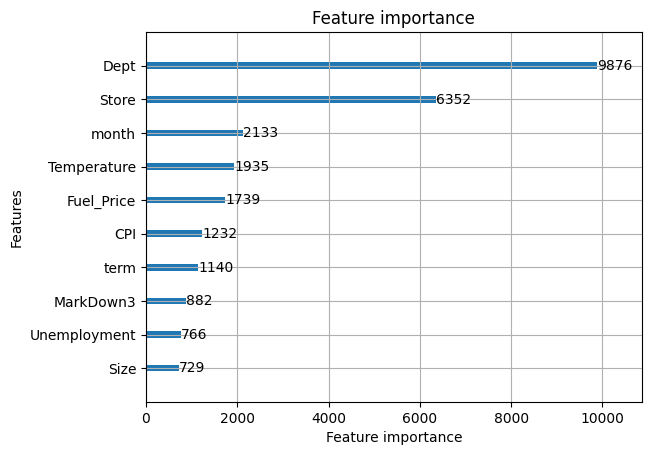

In [60]:
lgb.plot_importance(model, max_num_features=10)
plt.show()

In [61]:
df_test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [62]:
df1_te=pd.merge(pd.merge(df_test,stores),feature)

df1_te

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


In [63]:
#df1_te に対してあなたが定義した preprocess 関数を適用して、
#月（month）と日（term）の列を追加しつつ、指定された5列をカテゴリ型に変換
df1_te=preprocess(df1_te)

df1_te

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,term
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,11,1
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,11,1
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,11,2
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,11,3
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,06,3
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,07,1
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,07,2
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,07,2


In [66]:
#予測値(Sales_Week)を出力
model.predict(df1_te.drop("Date",axis=1))

array([27991.30937182, 28089.66491936, 20578.33877071, ...,
       -1375.63952568, -1428.94848994, -1177.03299681], shape=(115064,))

In [74]:
preds=model.predict(df1_te.drop("Date",axis=1))
#array型⇒数字の羅列、df型⇒行/列を持つ形 に変更
df2=pd.DataFrame(preds)
df2

,0
0,27991.309372
1,28089.664919
2,20578.338771
3,20159.534438
4,25154.400563
...,...
115059,-298.288627
115060,-692.174418
115061,-1375.639526
115062,-1428.948490


In [79]:
#0のcolumnsをWeekly_salesに変更
df2=df2.rename(columns={0:"Weekly_Sales"})
df2

,Weekly_Sales
0,27991.309372
1,28089.664919
2,20578.338771
3,20159.534438
4,25154.400563
...,...
115059,-298.288627
115060,-692.174418
115061,-1375.639526
115062,-1428.948490


In [86]:
#concat⇒行/縦(axis=0)、列/横(axis=1) ※結合対象を[]で囲む
df1_test=pd.concat([df1_te,df2],axis=1)
df1_test

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,term,Weekly_Sales
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,11,1,27991.309372
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,11,1,28089.664919
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,11,2,20578.338771
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,11,3,20159.534438
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,11,3,25154.400563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,06,3,-298.288627
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,07,1,-692.174418
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,07,2,-1375.639526
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,07,2,-1428.948490


In [88]:
submit #idの構成がstore-dept-dateなので、sortして対応するidを作る必要がある

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


In [92]:
#df1_testのWeekly_Salesの値がStore/Dept/Dateの順でWeekly_Salesがsortされた状態
df1_test.sort_values(["Store","Dept","Date"])["Weekly_Sales"]

0         27991.309372
1         28089.664919
2         20578.338771
3         20159.534438
4         25154.400563
              ...     
115059     -298.288627
115060     -692.174418
115061    -1375.639526
115062    -1428.948490
115063    -1177.032997
Name: Weekly_Sales, Length: 115064, dtype: float64

In [94]:
#submit[Weekly_Sales]にあてはめる
submit["Weekly_Sales"]=df1_test.sort_values(["Store","Dept","Date"])["Weekly_Sales"]
submit

,Id,Weekly_Sales
0,1_1_2012-11-02,27991.309372
1,1_1_2012-11-09,28089.664919
2,1_1_2012-11-16,20578.338771
3,1_1_2012-11-23,20159.534438
4,1_1_2012-11-30,25154.400563
...,...,...
115059,45_98_2013-06-28,-298.288627
115060,45_98_2013-07-05,-692.174418
115061,45_98_2013-07-12,-1375.639526
115062,45_98_2013-07-19,-1428.948490


In [99]:
#index(行番号)を外す⇒index=False
submit.to_csv("submit.csv",index=False,encoding="utf-8-sig")